In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.datasets import load_wine
wine=load_wine()

In [6]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
df.shape

(178, 13)

In [9]:
print("The target variables are: ",wine.target_names)

The target variables are:  ['class_0' 'class_1' 'class_2']


In [10]:
df['target']=wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
print("Basic Information about wine: ",wine.DESCR[:593])

Basic Information about wine:  .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary


<AxesSubplot:xlabel='target', ylabel='count'>

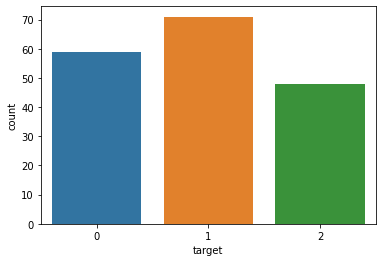

In [19]:
sns.countplot(data=df,x=df['target'])

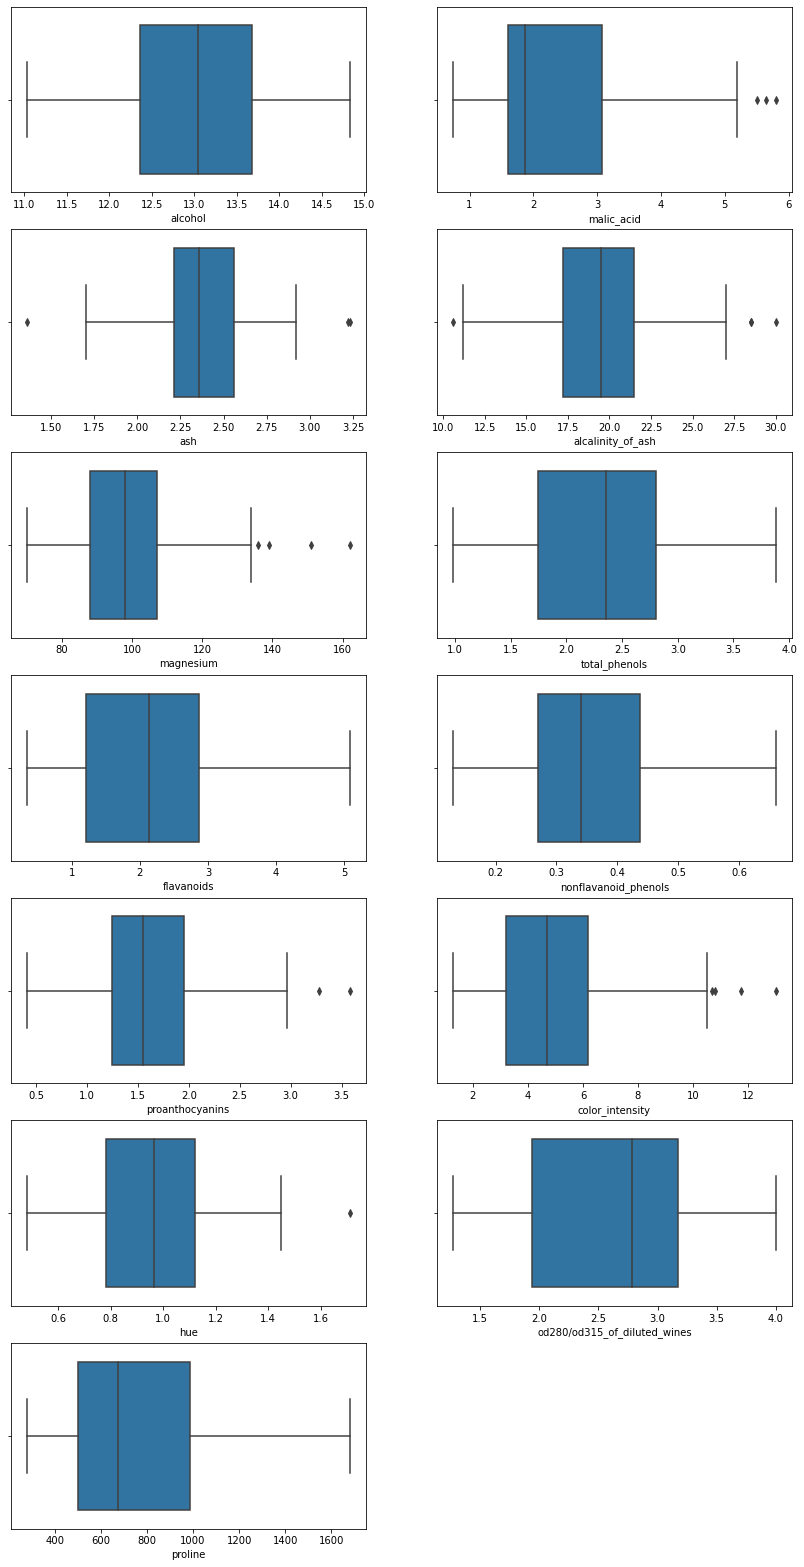

In [25]:
plt.figure(figsize=(14,28))
i=1
for col in wine.feature_names:
    plt.subplot(7,2,i)
    sns.boxplot(data=df,x=df[col])
    i=i+1

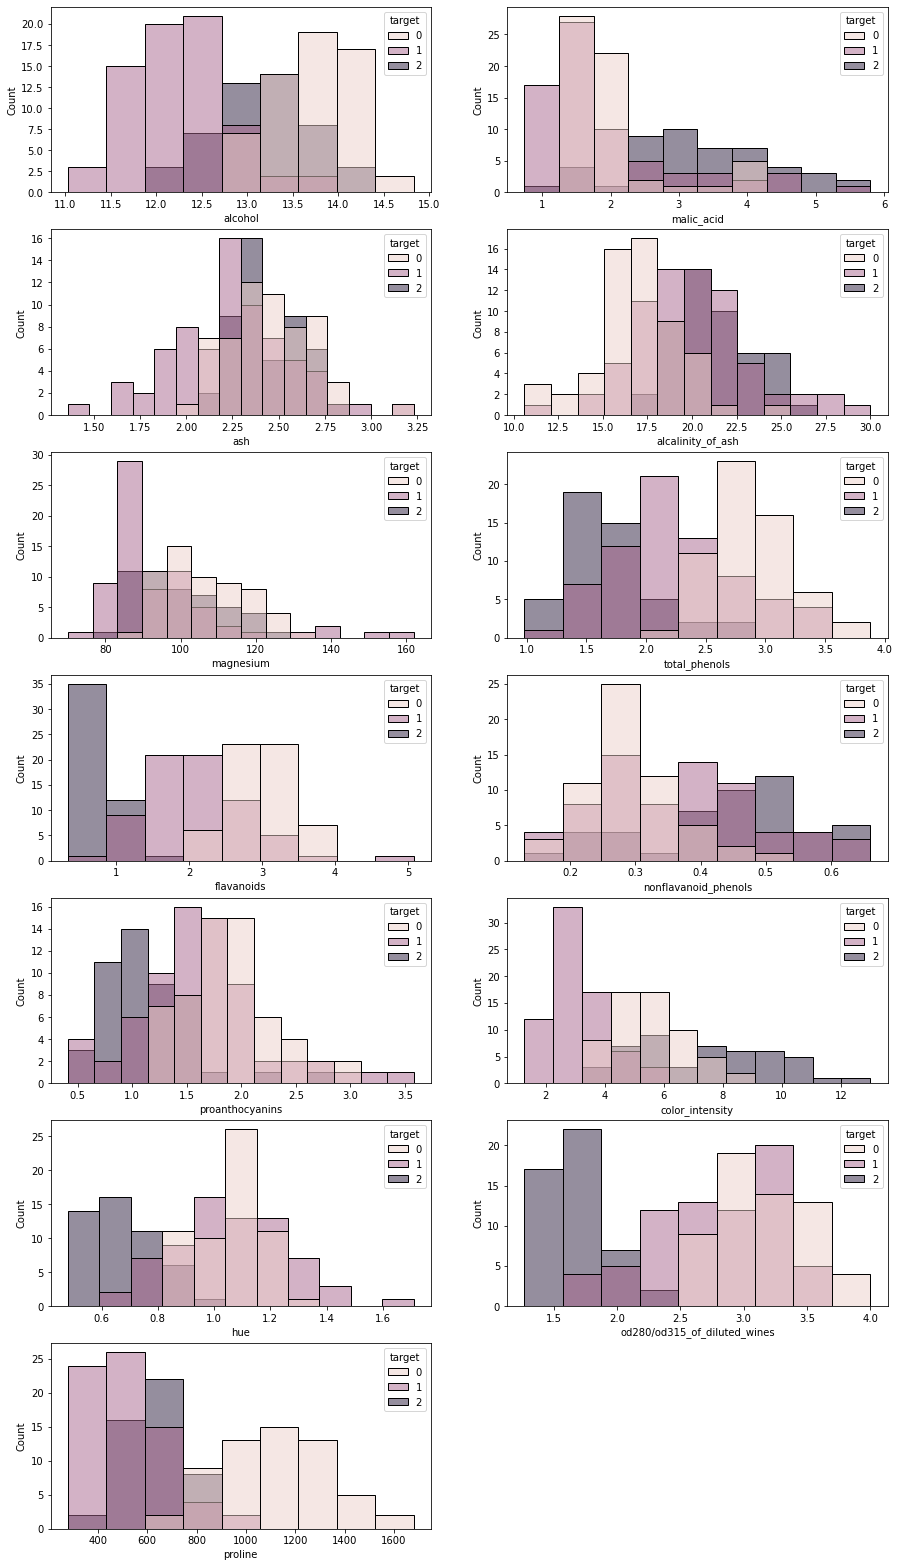

In [26]:
plt.figure(figsize=(15,28))
i=1
for col in wine.feature_names:
    plt.subplot(7,2,i)
    sns.histplot(data=df,x=df[col],hue='target')
    i=i+1

<AxesSubplot:>

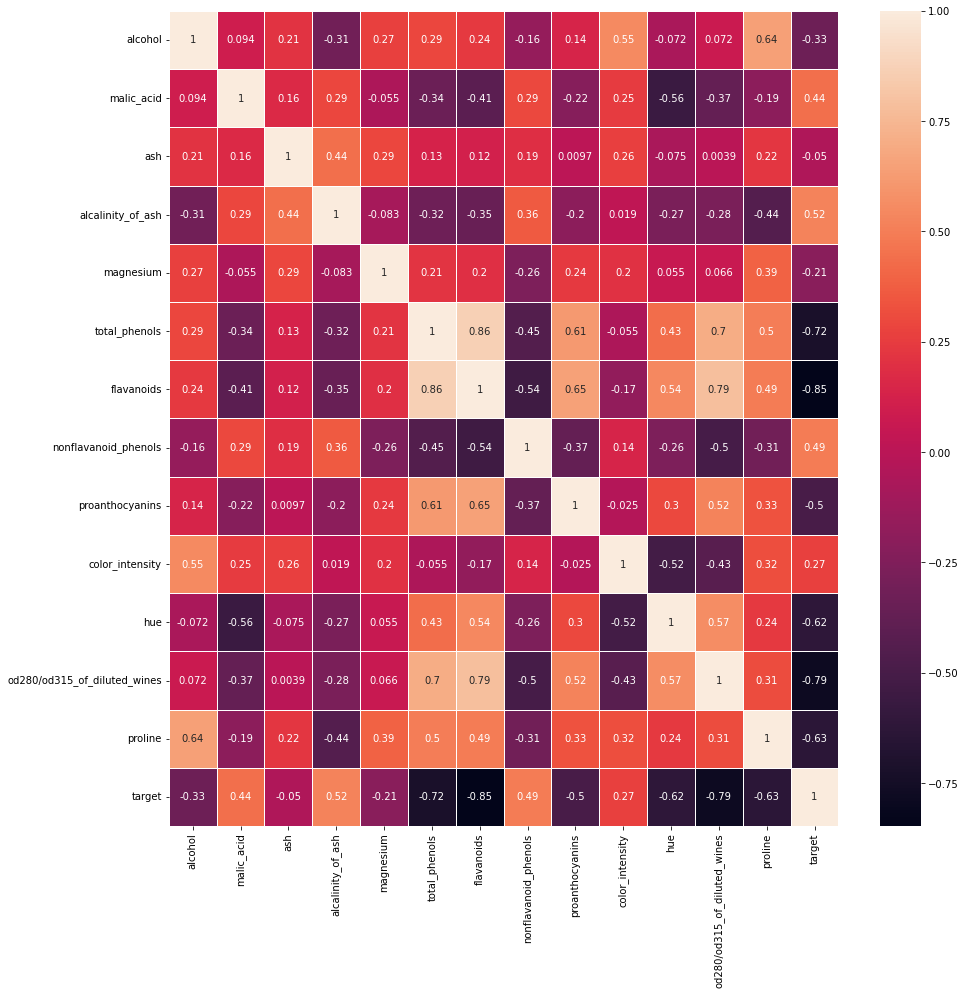

In [29]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=.5,ax=ax)

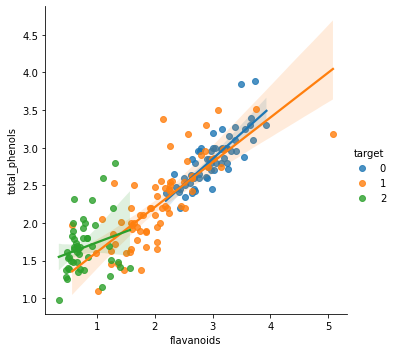

In [32]:
sns.lmplot(data=df,x='flavanoids',y='total_phenols',hue='target')

In [36]:
df.shape

(178, 14)

In [45]:
from sklearn.feature_selection import SelectKBest,f_classif
dv=df.values
X=dv[:,0:13]
y=dv[:,13]
y=wine.target
X_new=SelectKBest(score_func=f_classif,k=7).fit_transform(X,y)
X_new.shape

(178, 7)

In [42]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_new=pca.fit_transform(X_new)
print(X_new.shape)
print("Variance caputred by the PCA is: ",pca.explained_variance_ratio_)

(178, 2)
Variance caputred by the PCA is:  [9.99946515e-01 5.34848121e-05]


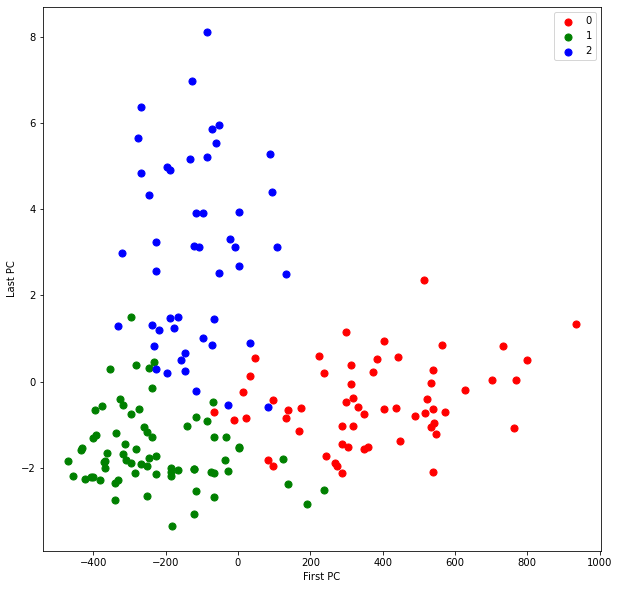

In [44]:
pcadf=pd.DataFrame(data=X_new,columns=['PCA 1','PCA 2'])
plt.figure(figsize=(10,10))
plt.xlabel("First PC")
plt.ylabel("Last PC")
targets=[0,1,2]
colors=['r','g','b']
for target,color in zip(targets,colors):
    idx=df['target']==target
    plt.scatter(pcadf.loc[idx,'PCA 1'],pcadf.loc[idx,'PCA 2'],c=color,s=50)
plt.legend(targets)
plt.show()

In [62]:
from sklearn.preprocessing import MinMaxScaler
X_new=MinMaxScaler().fit_transform(X_new)
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)

(142, 13) (36, 13) (142,) (36,)


In [88]:
from sklearn.metrics import confusion_matrix,classification_report
def classify(model):
    model.fit(X_train1,y_train1)
    print("The accuracy of the classifier is: {:.2f}".format(model.score(X_test1,y_test1)))
    y_pred1=model.predict(X_test1)
    cm=confusion_matrix(y_test1,y_pred1,labels=model.classes_)
    sns.heatmap(cm,annot=True)
    print(classification_report(y_test1,y_pred1,labels=model.classes_))

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

The accuracy of the classifier is: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



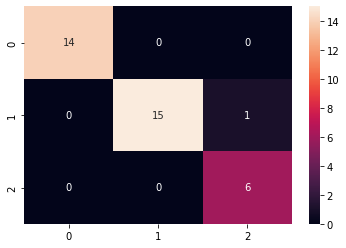

In [89]:
classify(LogisticRegression(max_iter=3000))

The accuracy of the classifier is: 0.81
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.88      0.88      0.88        16
           2       0.40      0.33      0.36         6

    accuracy                           0.81        36
   macro avg       0.71      0.71      0.71        36
weighted avg       0.79      0.81      0.80        36



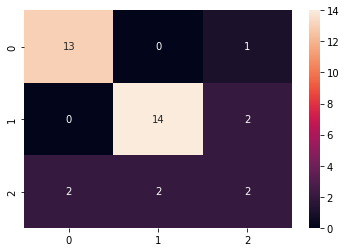

In [90]:
classify(KNeighborsClassifier())

The accuracy of the classifier is: 0.81
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.78      0.88      0.82        16
           2       0.40      0.33      0.36         6

    accuracy                           0.81        36
   macro avg       0.73      0.71      0.72        36
weighted avg       0.80      0.81      0.80        36



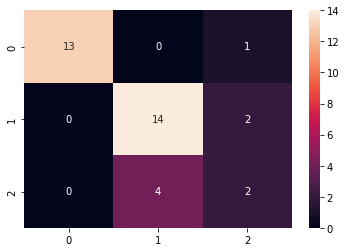

In [91]:
classify(SVC(C=0.5))

The accuracy of the classifier is: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



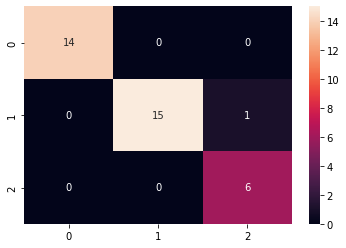

In [92]:
classify(SVC(kernel='linear'))

The accuracy of the classifier is: 0.97
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



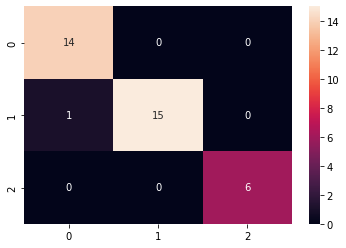

In [96]:
clf=DecisionTreeClassifier(max_depth=5)
classify(clf)

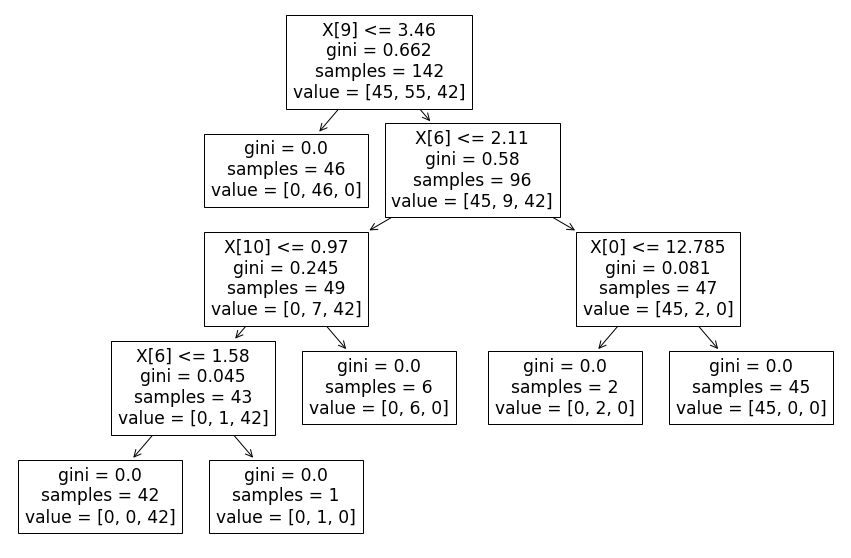

In [98]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(15,10))
plt.subplot(111)
plot_tree(clf)
plt.show()